# [112-2 多媒體技術與應用] Homework <br>

<font size = 4>
    請用.ipynb交作業，檔名用HW_學號_名稱.ipynb，例如: HW_0123456_黃大明.ipynb

## Q1 多元回歸(Multiple regression) (25%)


$$
({\bf{x}}_i,y_i) , {\bf{x}}_i = \begin{bmatrix} 1 \\ x_{i1} \\ \vdots \\ x_{id}\\ \end{bmatrix} \in R^{d+1}, \forall i=1,2,...,n 
$$

$$
{\bf{Y}} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\\ \end{bmatrix}, 
{\bf{\beta}} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_n\\ \end{bmatrix},
{\bf{X}} = \begin{bmatrix} \bf{X}_1^T \\ \bf{X}_2^T  \\ \vdots \\ \bf{X}_n^T \\ \end{bmatrix}
 = \begin{bmatrix} 1&x_{11}&...&x_{1d} \\ \ 1&x_{21}&...&x_{2d}  \\ \vdots \\ \ 1&x_{n1}&...&x_{nd} \\ \end{bmatrix} 
$$

**Regression:** $$\bf{Y}=  {\bf{X}}{\bf{\beta}}$$

$$
loss({\bf{\beta}})=(\bf{Y}-\hat{\bf{Y}})^T(\bf{Y}-\hat{\bf{Y}})
$$

<font size=4 color=red>**找${\bf{\beta}}$的closed-form solution**

$
\begin{aligned}
\beta=&(\bf{X}^T\bf{X})^{-1}\bf{X}^T\bf{Y}
\end{aligned}
$

## Q2. 依據第Q1推出的公式做python程式(Numpy)撰寫 ，寫一個Multiple regression  (25%)<br>
Data在HW-RegressionExample.txt，第1欄是dependent variable(${\bf{Y}}$), 第2~5欄是independent variable(${\bf{X}}$)。<br><br>
<font size=4 color=red> 請用python print出算出來的$\beta$結果。</font>

In [1]:
import numpy as np

data = np.loadtxt("HW-RegressionExample.txt")
X = data[:,1:]
Y = data[:,0]

beta_array = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)

for i,v in enumerate(beta_array):
    print(f"Beta{i}: {v}")    

Beta0: -661.4288797818158
Beta1: 0.1082454952402607
Beta2: -0.44061457302175366
Beta3: 149.9744831103934


## Q3 (50%)
<font size=3>
  
讀取「data_weight_multlfeatutes.xlsx」<br>
利用<font color=red>'身高', '體重'</font>當作自變數(X)<br>
<font color=red>'性別'</font>作為依變數(Y)。<br>
        
利用Pytorch寫一個簡單的羅吉斯回歸(logistic regression)分類(訓練X，然後評估訓練後X的正確率)<br>

$$
y_{hat} = \sigma(\beta_1 \times x_{身高}+\beta_2 \times x_{體重} + \beta_0)
$$
    

進行求解  <br>

1. 學習率0.1，學習次數10000次<br>
2. 學習率0.01，學習次數10000次<br>

I. 在每個實驗中都要劃出loss的變化(10%) <br> 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$(10%)<br> 
III. 劃出模型Decision Boundary的熱點圖。(20%)<br> 

3. 說明一下你看到的現象。 (10%)

    
-------------------------
以下為Hint<br>
訓練模型前請設定下面的random seed
```
import torch
torch.manual_seed(202404)
```
'身高': 前處理先除上200<br>
'體重': 前處理先除上100

print最後解的羅吉斯回歸的$\beta$   
```
print(model.linear.weight)
print(model.linear.bias)
```
理論上求出來的解如下:
    

I. 在每個實驗中都要劃出loss的變化<br>
loss = torch.nn.BCELoss()
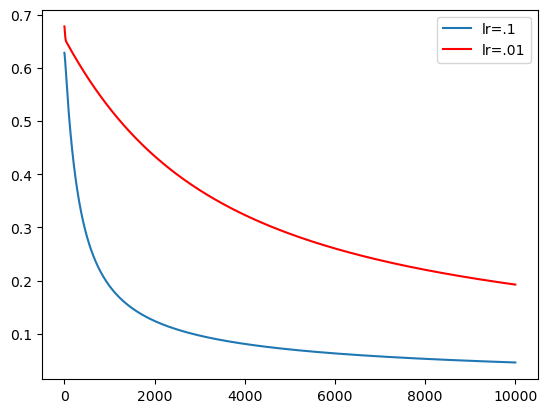  
 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$<br>
    
|learning rate|$\beta_0$| $\beta_1$| $\beta_2$|
|:-:|:-:|:-:|:-:|
|0.1|-29.9621|5.0617| 41.4960|    
|0.01|-11.0679| 1.2951| 16.4604|   

III. 劃出模型Decision Boundary的熱點圖。<br> 
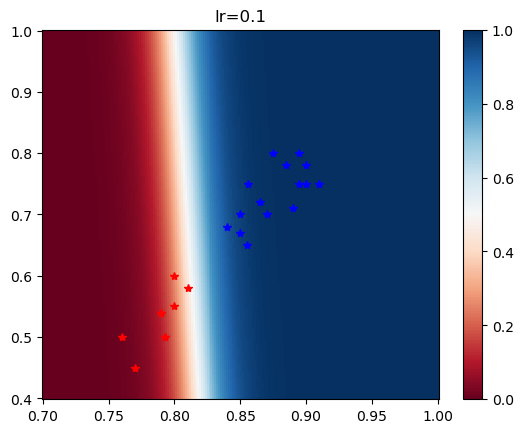
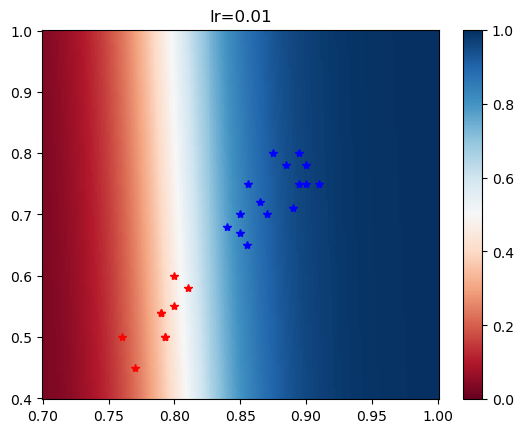

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(202404)

data = pd.read_excel('data_weight_multlfeatutes.xlsx')
data['身高'] /= 200
data['體重'] /= 100
data['性別'] = data['性別'].apply(lambda x: 1 if x == '男' else 0)

X = torch.tensor(data[['身高', '體重']].values, dtype=torch.float32)
Y = torch.tensor(data['性別'].values, dtype=torch.float32).view(-1, 1)

In [3]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [4]:
def train_model(X, Y, learning_rate, num_epochs):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    
    losses = []

    for epoch in range(num_epochs):
        outputs = model(X)
        loss = criterion(outputs, Y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())

        if (epoch+1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
            
    return model, losses

In [5]:
model1, losses1 = train_model(X, Y, learning_rate=0.1, num_epochs=10000)
model2, losses2 = train_model(X, Y, learning_rate=0.01, num_epochs=10000)

Epoch [1000/10000], Loss: 0.1903
Epoch [2000/10000], Loss: 0.1244
Epoch [3000/10000], Loss: 0.0969
Epoch [4000/10000], Loss: 0.0813
Epoch [5000/10000], Loss: 0.0709
Epoch [6000/10000], Loss: 0.0635
Epoch [7000/10000], Loss: 0.0578
Epoch [8000/10000], Loss: 0.0532
Epoch [9000/10000], Loss: 0.0495
Epoch [10000/10000], Loss: 0.0464
Epoch [1000/10000], Loss: 0.5245
Epoch [2000/10000], Loss: 0.4341
Epoch [3000/10000], Loss: 0.3702
Epoch [4000/10000], Loss: 0.3235
Epoch [5000/10000], Loss: 0.2882
Epoch [6000/10000], Loss: 0.2606
Epoch [7000/10000], Loss: 0.2386
Epoch [8000/10000], Loss: 0.2205
Epoch [9000/10000], Loss: 0.2055
Epoch [10000/10000], Loss: 0.1928


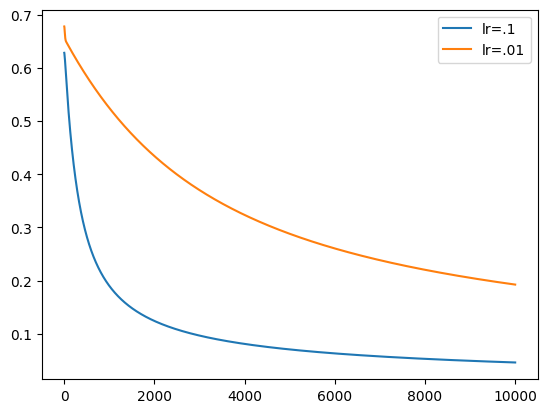

In [6]:
plt.plot(losses1,label="lr=.1")
plt.plot(losses2,label="lr=.01")
plt.legend()
plt.show()

In [7]:
print("b0 (bias):", model1.linear.bias.item())
print("b1 (weight for height):", model1.linear.weight[0][0].item())
print("b2 (weight for weight):", model1.linear.weight[0][1].item())
print()
print("b0 (bias):", model2.linear.bias.item())
print("b1 (weight for height):", model2.linear.weight[0][0].item())
print("b2 (weight for weight):", model2.linear.weight[0][1].item())

b0 (bias): -29.962060928344727
b1 (weight for height): 5.061667442321777
b2 (weight for weight): 41.495967864990234

b0 (bias): -11.067852973937988
b1 (weight for height): 1.2950735092163086
b2 (weight for weight): 16.460403442382812


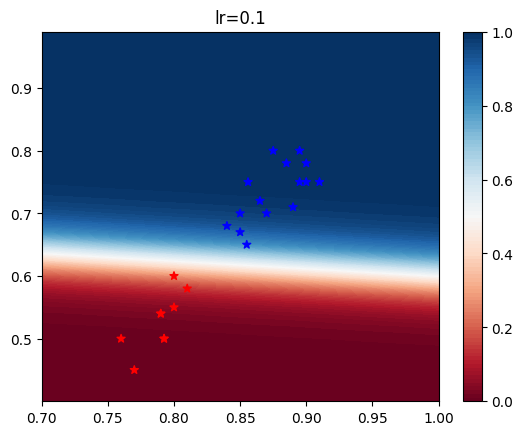

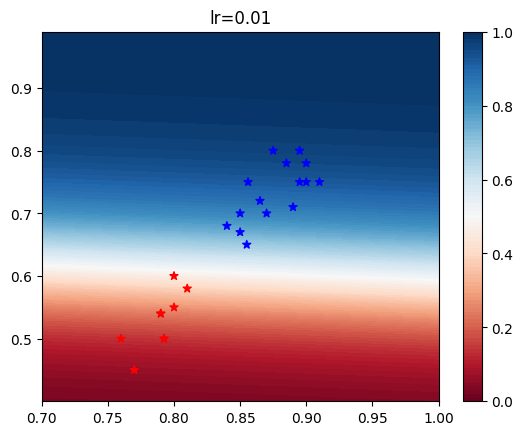

In [13]:
def plot_decision_boundary(X, Y, model,lr):
    # x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    # y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    x_min, x_max = 0.7, 1.0
    y_min, y_max = 0.4, 1.0
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01),torch.arange(y_min, y_max, 0.01),indexing="xy")
    Z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1))
    Z = Z.detach().numpy().reshape(xx.shape)

    f, ax = plt.subplots()
    contour = ax.contourf(xx, yy, Z,  np.linspace(0, 1, 100), cmap="RdBu")
    ax_c = f.colorbar(contour)
    ax_c.set_ticks([0,0.2,0.4,0.6,0.8,1])
    ax.scatter(X[:, 0], X[:, 1], c=Y.flatten(), marker="*", cmap='bwr_r')
    ax.set_title(f"lr={lr}")

plot_decision_boundary(X, Y, model1, 0.1)
plot_decision_boundary(X, Y, model2, 0.01)

可以發現 learning rate 是 0.1 時比 learning rate 是 0.01 時， loss 下降速度比較快。並且在熱點圖中可以看到 0.1 的邊界比較清晰，說明它的模型在判斷時會比較肯定性別。但由於訓練的資料都是向同的且沒有打亂，所以還是不要太相信它比較好。